In [2]:
# -*- coding: utf-8 -*-

In [3]:
import nbimporter
from CNN_Model import *
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from keras.applications import imagenet_utils

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
n_classes =  133
n_rows = 32
n_cols = 32
%matplotlib inline

In [13]:
def predictY(model,X_test):
    X_test = X_test.reshape(X_test.shape[0],n_rows,n_cols,1)
    predictions = model.predict(X_test,batch_size = 50,verbose =1 )
    return np.array(predictions)

In [16]:
n_classes = 133
n_rows = 32
n_cols = 32
batch_size = 256
epochs = 20
learning_rate = 0.01
decay = 1e-6
momentum = .9

In [17]:
def create_model_BN():
    # conv-conv-pool ==> conv-conv-pool ==> dense ==>dense
    print('Building Model..')
    model = Sequential()
    
    model.add(Conv2D(32,(3,3),input_shape=(n_rows,n_cols,1),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    BatchNormalization(axis=1)
    model.add(Conv2D(64,(3,3),activation='relu'))
    BatchNormalization(axis=1)
    model.add(MaxPooling2D((2,2),strides=(2,2)))
    model.add(ZeroPadding2D((1,1)))
    
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    BatchNormalization(axis=1)
    model.add(Conv2D(64,(3,3),activation='relu')) 
    BatchNormalization(axis=1)

    model.add(MaxPooling2D((2,2),strides=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(2018, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(n_classes, activation='softmax'))
    
    sgd = SGD(lr = learning_rate, decay = decay, momentum = momentum,nesterov=True)
    model.compile(optimizer = sgd, loss='categorical_crossentropy',metrics=['accuracy'])
    
    print('Model Generated')
    
    return model

In [18]:
model = create_model_BN()

Building Model..
Model Generated


In [20]:
model.load_weights("/home/amrith/Machine-Learning/MalayalamOCR/Successful-Models/train3_BN_96.h5")

In [21]:
X_train,X_test,y_train,y_test = mal_char_data()

In [22]:
predictions = predictY(model,X_test)

8644/8644 [==============================] - 35s    


In [23]:
predictions.shape

(8644, 133)

In [24]:
predicted_classes = [np.argmax(x) for x in predictions]

In [25]:
encoder = preprocessing.LabelEncoder()
X_train,X_test,y_train,y_test = loadDatasetFromFile()

In [26]:
encoder.fit(y_train)

LabelEncoder()

In [27]:
classList = np.asarray(encoder.classes_)

In [28]:
classList

array(["'", "'2", '(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', "item_''", 'item_,', 'item_dot', 'item_ques',
       '\xe0\xb4\x85', '\xe0\xb4\x86', '\xe0\xb4\x87', '\xe0\xb4\x89',
       '\xe0\xb4\x8b', '\xe0\xb4\x8e', '\xe0\xb4\x8f', '\xe0\xb4\x92',
       '\xe0\xb4\x95', '\xe0\xb4\x95\xe0\xb5\x8d\xe0\xb4\x95',
       '\xe0\xb4\x95\xe0\xb5\x8d\xe0\xb4\xa4',
       '\xe0\xb4\x95\xe0\xb5\x8d\xe0\xb4\xb7', '\xe0\xb4\x96',
       '\xe0\xb4\x97', '\xe0\xb4\x97\xe0\xb5\x8d\xe0\xb4\x97',
       '\xe0\xb4\x97\xe0\xb5\x8d\xe0\xb4\xa8',
       '\xe0\xb4\x97\xe0\xb5\x8d\xe0\xb4\xae',
       '\xe0\xb4\x97\xe0\xb5\x8d\xe0\xb4\xb2', '\xe0\xb4\x98',
       '\xe0\xb4\x99', '\xe0\xb4\x99\xe0\xb5\x8d\xe0\xb4\x95',
       '\xe0\xb4\x99\xe0\xb5\x8d\xe0\xb4\x99', '\xe0\xb4\x9a',
       '\xe0\xb4\x9a\xe0\xb5\x8d\xe0\xb4\x9a',
       '\xe0\xb4\x9a\xe0\xb5\x8d\xe0\xb4\x9b', '\xe0\xb4\x9b',
       '\xe0\xb4\x9c', '\xe0\xb4\x9c\xe0\xb5\x8d\xe0\xb4\x9c',
       '\xe0\xb4\x9c\xe0\

In [29]:
import matplotlib.pyplot as plt
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i].decode('utf-8'), fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [30]:
def plots_idx(idx, titles=None):
    plots([image.array_to_img((X_test[i].reshape(32,32,1))) for i in idx], titles=titles)
n_view=4

In [31]:
def samplePrediction():
    random_images = np.random.randint(0,X_test.shape[0],4)
    class_labels = classList[predicted_classes][random_images]
    plots_idx(random_images)
    for x in class_labels:
        print x.decode('utf-8'),

ആ െ പ്പ ക്ഷ


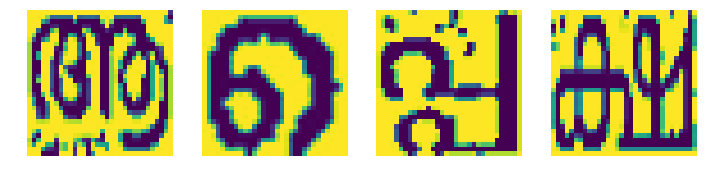

In [36]:
samplePrediction()